In [4]:
# Numerical manipulation
import numpy as np
import pandas as pd
# Data acquisition
import requests
import json
# Visualization
%pylab inline
import matplotlib as mpl
import seaborn as sb
import plotly as pl
# Credential entry
from getpass import getpass

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Define locations for data and figures
data_dir = '../data/'
fig_dir = '../figs/'

Populating the interactive namespace from numpy and matplotlib


In [5]:
df_cit = pd.read_csv('/Users/s08857sy/Python/Capstone/CIT.csv')
df_cit

,State,cit,dbs,rank
0,WA,0.0,1621,1st
1,GA,6.0,1616,2nd
2,MN,9.8,1615,3rd
3,TX,0.0,1602,4th
4,NC,4.0,1568,5th
5,CO,4.6,1562,6th
6,VA,6.0,1552,7th
7,UT,5.0,1548,8th
8,TN,6.5,1536,9th
9,MA,8.0,1522,10th


In [6]:
# Capture the normalized data for unemployment and insurance coverage
norm = {
    'hi': mpl.colors.Normalize(vmin=df_cit['cit'].min(), vmax=df_cit['cit'].max()),
    'ur': mpl.colors.Normalize(vmax=df_cit['dbs'].max(), vmin=df_cit['dbs'].min())
}

# Generate color mappers
cmapper = {
    'hi':mpl.cm.ScalarMappable(norm=norm['hi'], cmap='RdBu'),
    'ur':mpl.cm.ScalarMappable(norm=norm['ur'], cmap='PuOr')
}

# Map colors to values (hexadecimal colors are a little less verbose, which is why we are converting)
df_cit['cit_color'] = df_cit['cit'].apply(lambda x: cmapper['hi'].to_rgba(x))
df_cit['dbs_color'] = df_cit['dbs'].apply(lambda x: cmapper['ur'].to_rgba(x))


df_cit.head()

,State,cit,dbs,rank,cit_color,dbs_color
0,WA,0.0,1621,1st,"(0.403921568627451, 0.0, 0.12156862745098039, ...","(0.17647058823529413, 0.0, 0.29411764705882354..."
1,GA,6.0,1616,2nd,"(0.9657054978854287, 0.9672433679354094, 0.968...","(0.17647058823529413, 0.0, 0.29411764705882354..."
2,MN,9.8,1615,3rd,"(0.2366013071895425, 0.5418685121107266, 0.747...","(0.17647058823529413, 0.0, 0.29411764705882354..."
3,TX,0.0,1602,4th,"(0.403921568627451, 0.0, 0.12156862745098039, ...","(0.1944636678200692, 0.017993079584775085, 0.3..."
4,NC,4.0,1568,5th,"(0.9686274509803922, 0.7176470588235293, 0.599...","(0.22445213379469436, 0.047981545559400235, 0...."


Text(0.5,0.95,'Cost of Doing Business')

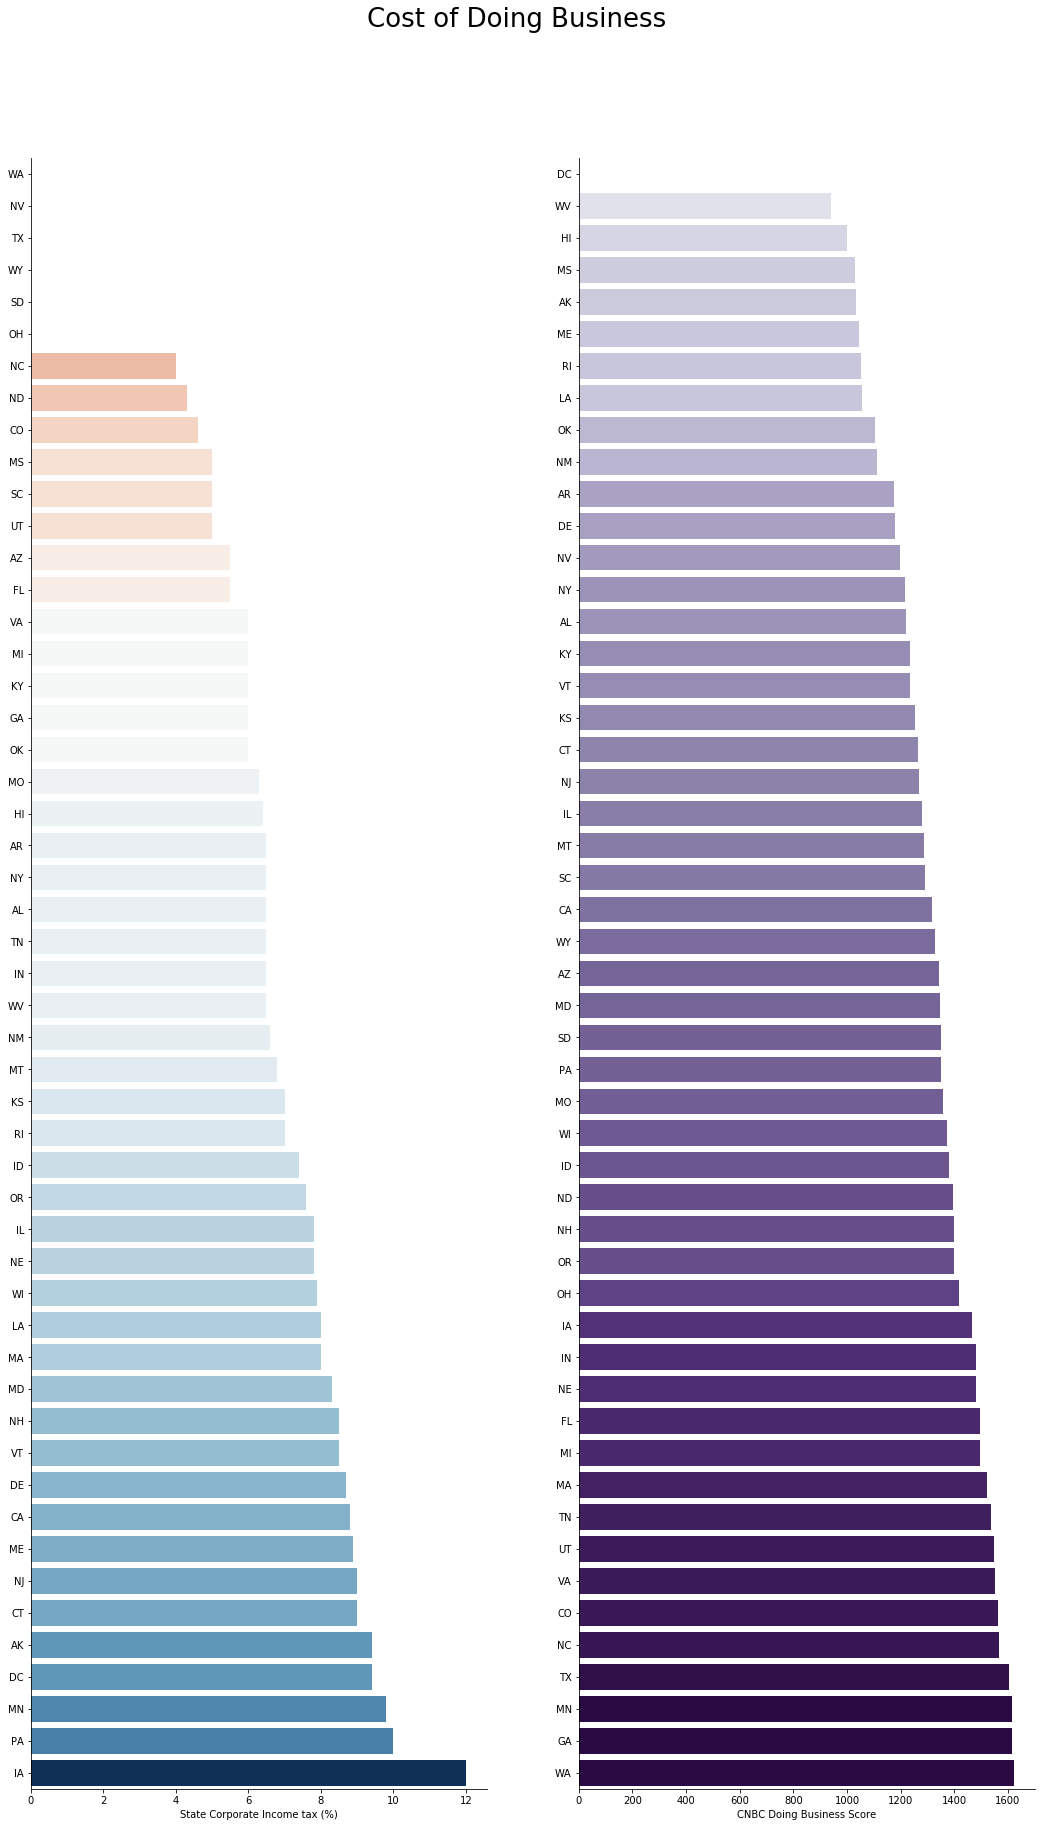

In [74]:
# Generate figure and axes
fig, ax = plt.subplots(1, 2, figsize=(18,30))

# Plot insurance data
hi_bar = df_cit[['cit', 'cit_color', 'State']].sort_values(by='cit')
sb.barplot('cit', 'State', palette=hi_bar['cit_color'], ax=ax[0], data=hi_bar)

# Plot unemployment data
ur_bar = df_cit[['dbs', 'dbs_color', 'State']].sort_values(by='dbs')
sb.barplot('dbs', 'State', palette=ur_bar['dbs_color'], ax=ax[1], data=ur_bar)




# Fix labels and axes
for a in ax:
    simpleaxis(a)
    a.set_ylabel('')
ax[0].set_xlabel('State Corporate Income tax (%)')
ax[1].set_xlabel('CNBC Doing Business Score')
plt.suptitle('Cost of Doing Business', fontsize=26, y=0.95)



Text(6,17,'6.0%')

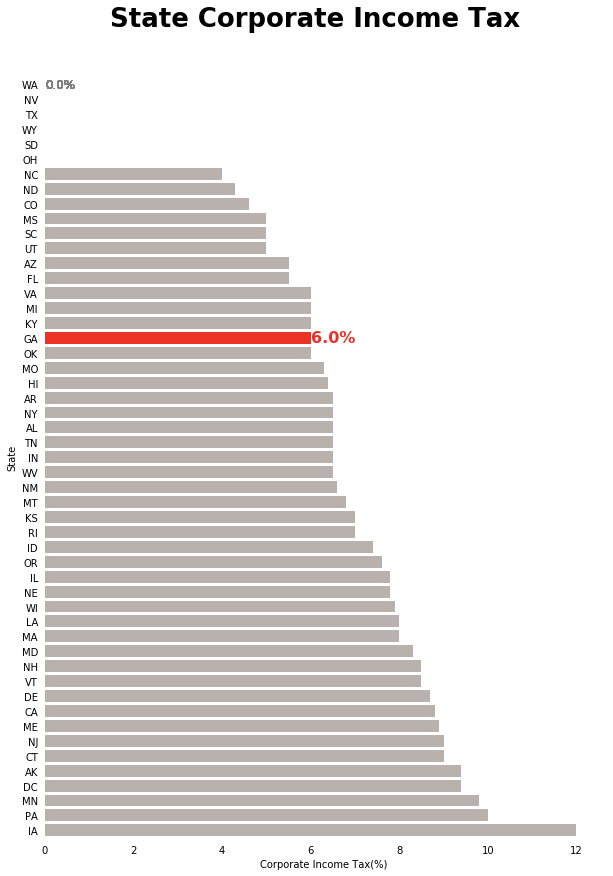

In [20]:
df_cit = df_cit.sort_values(by='cit')

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    
    ) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    
    ) # labels along the bottom edge are off


hi_bar = df_cit[['cit', 'cit_color', 'State']]
clrs = ['#BAB0AC' ]

bar1= sb.barplot('cit', 'State', palette=clrs, data=hi_bar)
ax.set_xlabel('Corporate Income Tax(%)')
bar1.get_children()[17].set_facecolor('#EB3227')

plt.suptitle('State Corporate Income Tax', weight='bold', fontsize=26, y=0.95, );




#ax = plt.gca()
#for p in ax.patches:
    #ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), 
            #fontsize=12, color='red', ha='left', va='center')
    
    
    
#Add data labels in bars





for i in range(len(df_cit)):
    

    
    data_val = df_cit['cit'].iloc[0]
    data_lab = '{:.1%}'.format(data_val/100.)
    # Note how we are using consistent offsets and alignment to get our strings positioned
    ax.annotate(data_lab, xy=(data_val, 0), 
            horizontalalignment='left', verticalalignment='center',
               fontsize=12, color='gray')
    
    
    
    
    
    
    
for i in range(len(df_cit)):
    data_val = df_cit['cit'].iloc[17]
    data_lab = '{:.1%}'.format(data_val/100.)    
ax.annotate(data_lab, xy=(data_val, 17), 
               horizontalalignment='left', verticalalignment='center',
               fontsize=16, weight='bold', color='#EB3227')
    

    


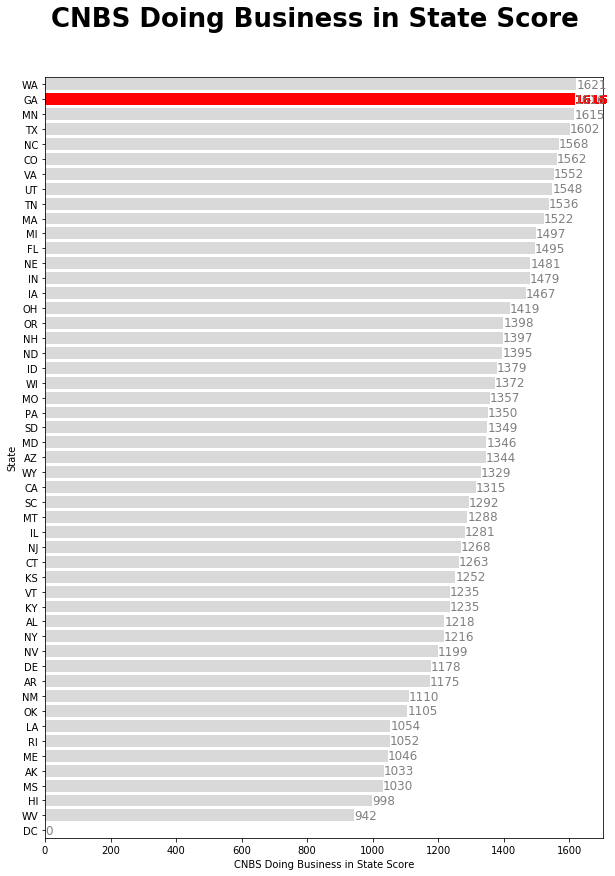

In [8]:
df_cit = df_cit.sort_values(by='dbs', ascending=False)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 14)

ur_bar = df_cit[['dbs', 'dbs_color', 'State']]

clrs = ['#d9d9d9' ]

bar2= sb.barplot('dbs', 'State', palette=clrs, data=ur_bar)
ax.set_xlabel('CNBS Doing Business in State Score')
bar2.get_children()[1].set_facecolor('red')

plt.suptitle('CNBS Doing Business in State Score', weight='bold', fontsize=26, y=0.95);

#ax = plt.gca()
#for p in ax.patches:
    #ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), 
            #fontsize=12, color='red', ha='left', va='center')
    
    
    
# Add data labels in bars
for i in range(len(df_cit)):
    data_val = df_cit['dbs'].iloc[1]
    
    # Note how we are using consistent offsets and alignment to get our strings positioned
    ax.annotate(data_val, xy=(data_val, 1), 
                horizontalalignment='left', verticalalignment='center',
               fontsize=12, weight='bold', color='Red')
    
    
    
    
for i in range(len(df_cit)):
    data_val = df_cit['dbs'].iloc[i]
    
    # Note how we are using consistent offsets and alignment to get our strings positioned
    ax.annotate(data_val, xy=(data_val, i), 
                horizontalalignment='left', verticalalignment='center',
               fontsize=12, color='gray')

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF

import numpy as np
import pandas as pd

df_cit = pd.read_csv('/Users/s08857sy/Python/Capstone/CIT.csv')

sample_data_table = FF.create_table(df.head())
py.iplot(sample_data_table, filename='sample-data-table')

In [39]:
data = [go.Bar(x=df_cit['cit'], 
               y=df_cit['State'],
            orientation = 'h',

)]

py.iplot(data, filename='horizontal-bar', color="orange")

layout = pl.graph_objs.Layout(
    title="State Corporate Income Tax",
    legend={"x":0.8, "y":0.1},
    xaxis={"title":"State Corporate Income TAx (%)"},
    yaxis={"title":"State"},
    autosize=False,
    width=1000,
    height=2000,
    
    
    
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='State Corporate Income Tax', )

